# Модуль 3

## Часть 1

### 1.1

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1tr=pd.read_csv('./training_datasets/train_data.csv')
df1tr.head()

,feature_1,feature_2,feature_3,label
0,1.750988e+04,-0.681507,0.750701,5
1,2.336432e+05,-0.584831,0.680264,5
2,3.160232e+07,-0.325012,0.299842,4
3,2.069916e+03,-0.533113,0.112504,2
4,1.653934e+09,0.224607,0.023237,3


In [3]:
df1tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  2400 non-null   float64
 1   feature_2  2400 non-null   float64
 2   feature_3  2400 non-null   float64
 3   label      2400 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 75.1 KB


<Figure size 768x512 with 0 Axes>

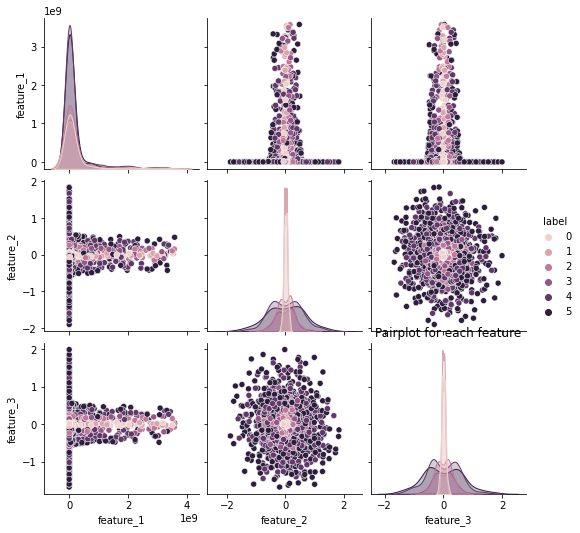

In [4]:
plt.figure(dpi=128)
sns.pairplot(df1tr, hue='label')
plt.title("Pairplot for each feature")
plt.show()

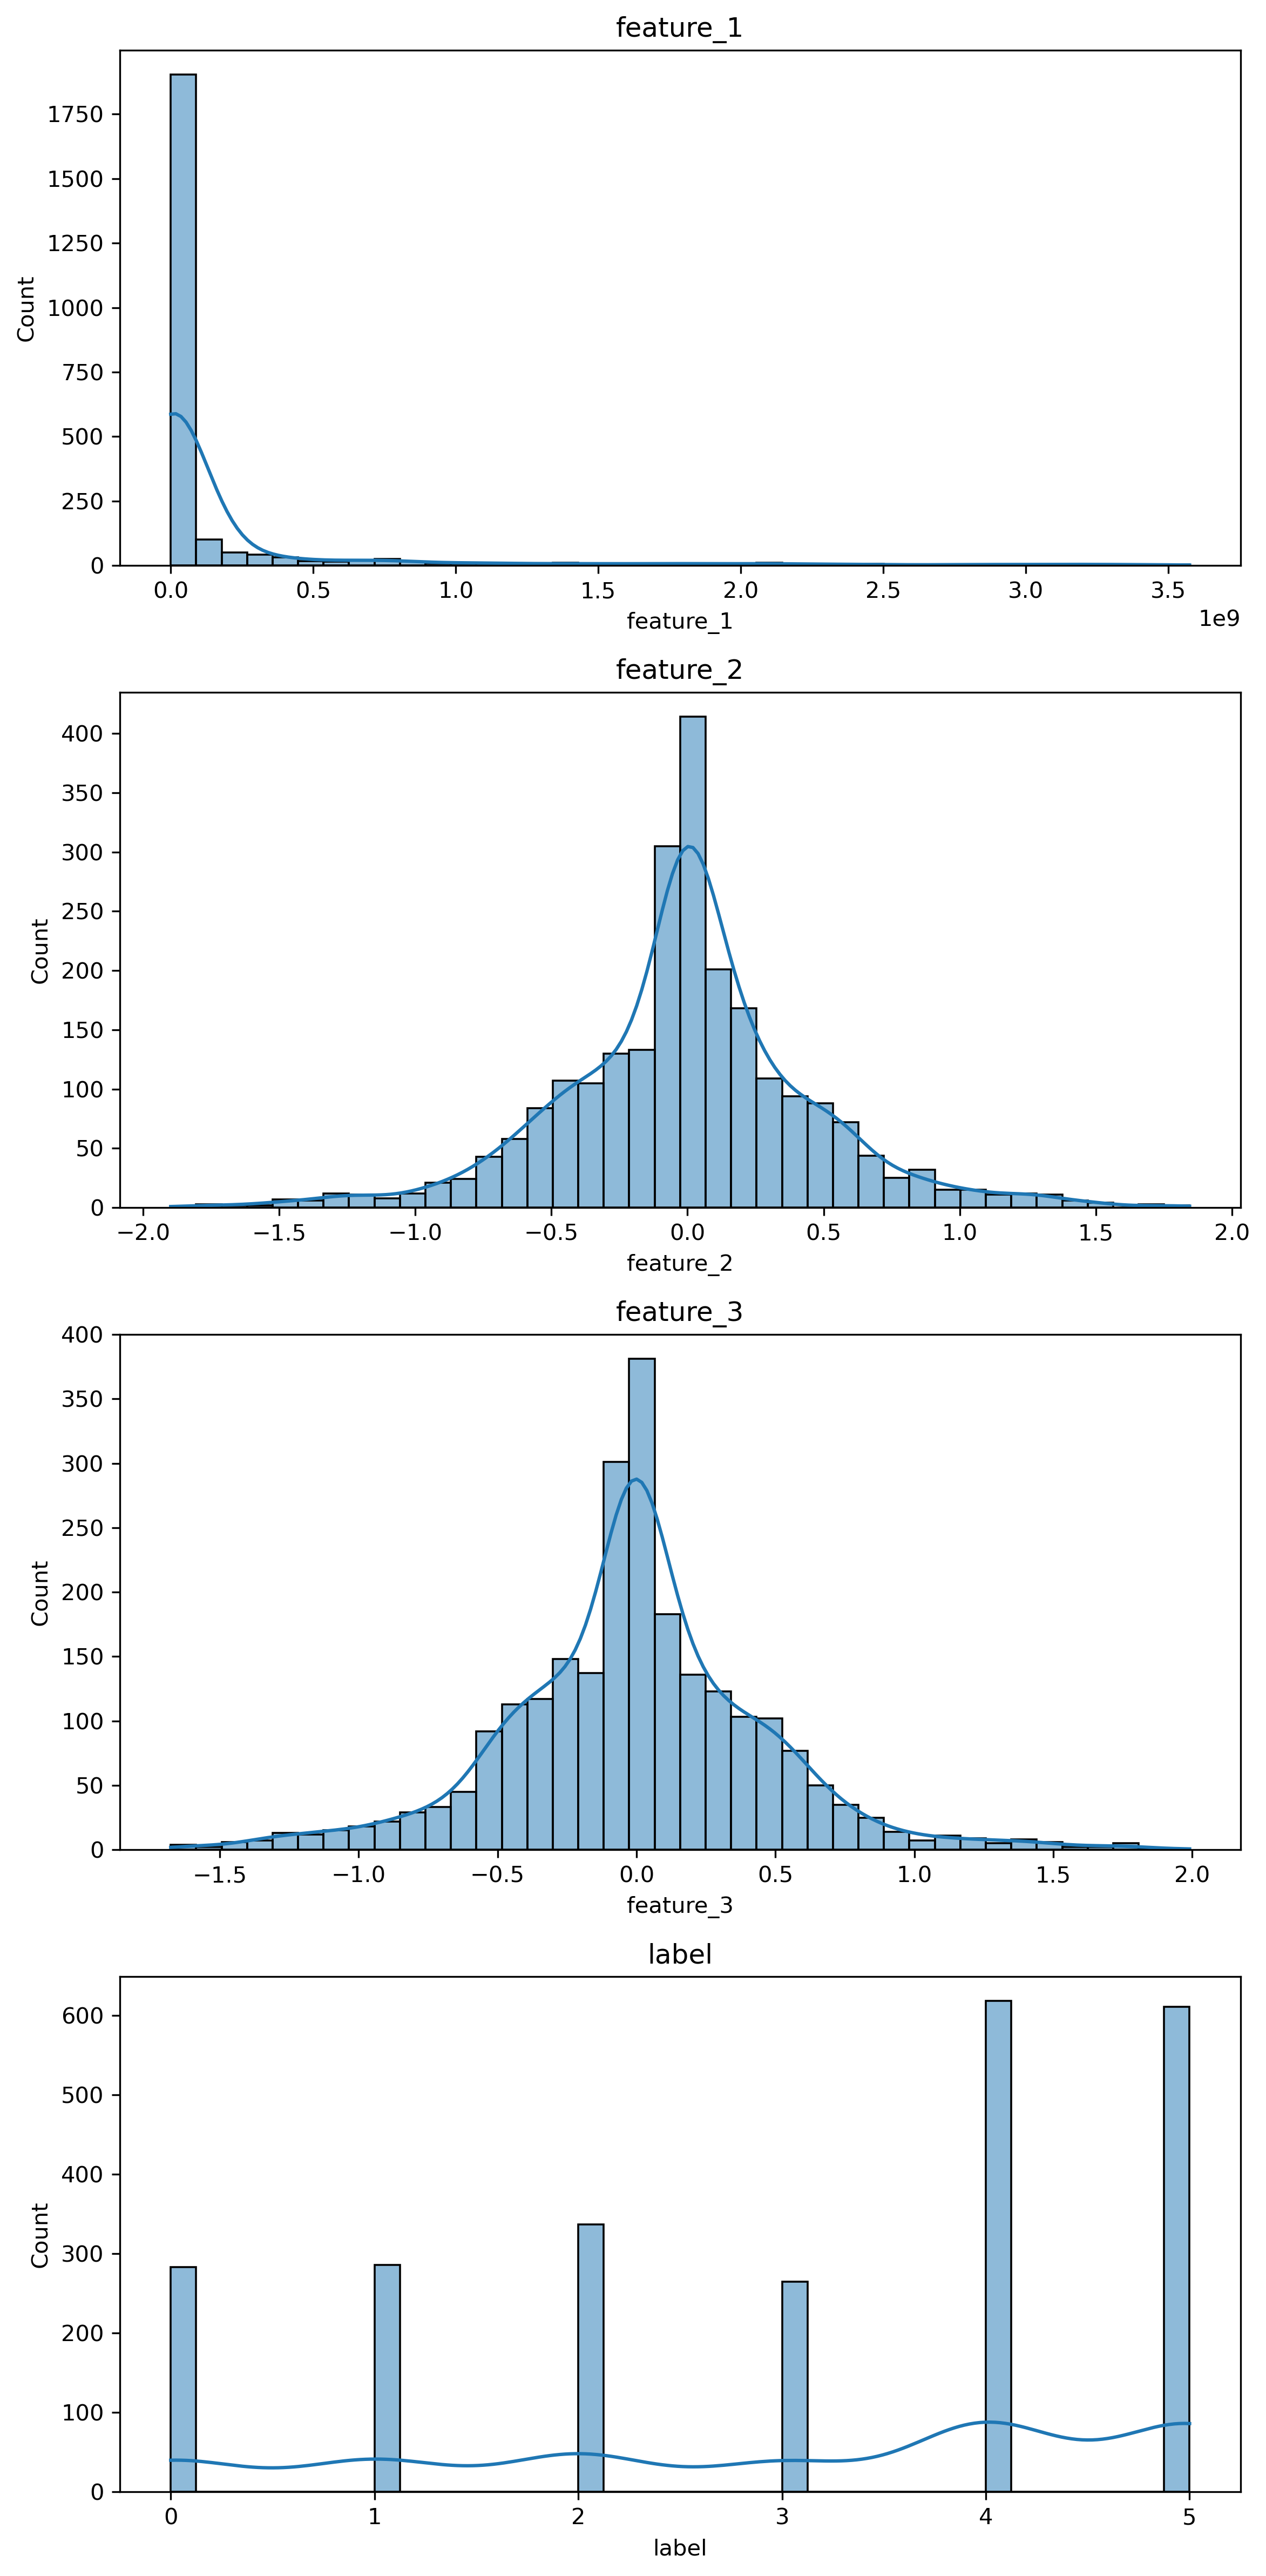

In [5]:
fig,axes = plt.subplots(1,1,figsize=(15,4 * 4),dpi=300)

for ind,col in enumerate(df1tr):
    plt.subplot(4,2,2*ind+1)
    sns.histplot(df1tr,x=col,bins=40,kde=True);
    plt.gca().set_title(col)

    
fig.tight_layout()
plt.show()

По выведенным графикам видим несбаллансированые классы и схожесть признаков 2 и 3 и очень непонятное распределение 1 признака

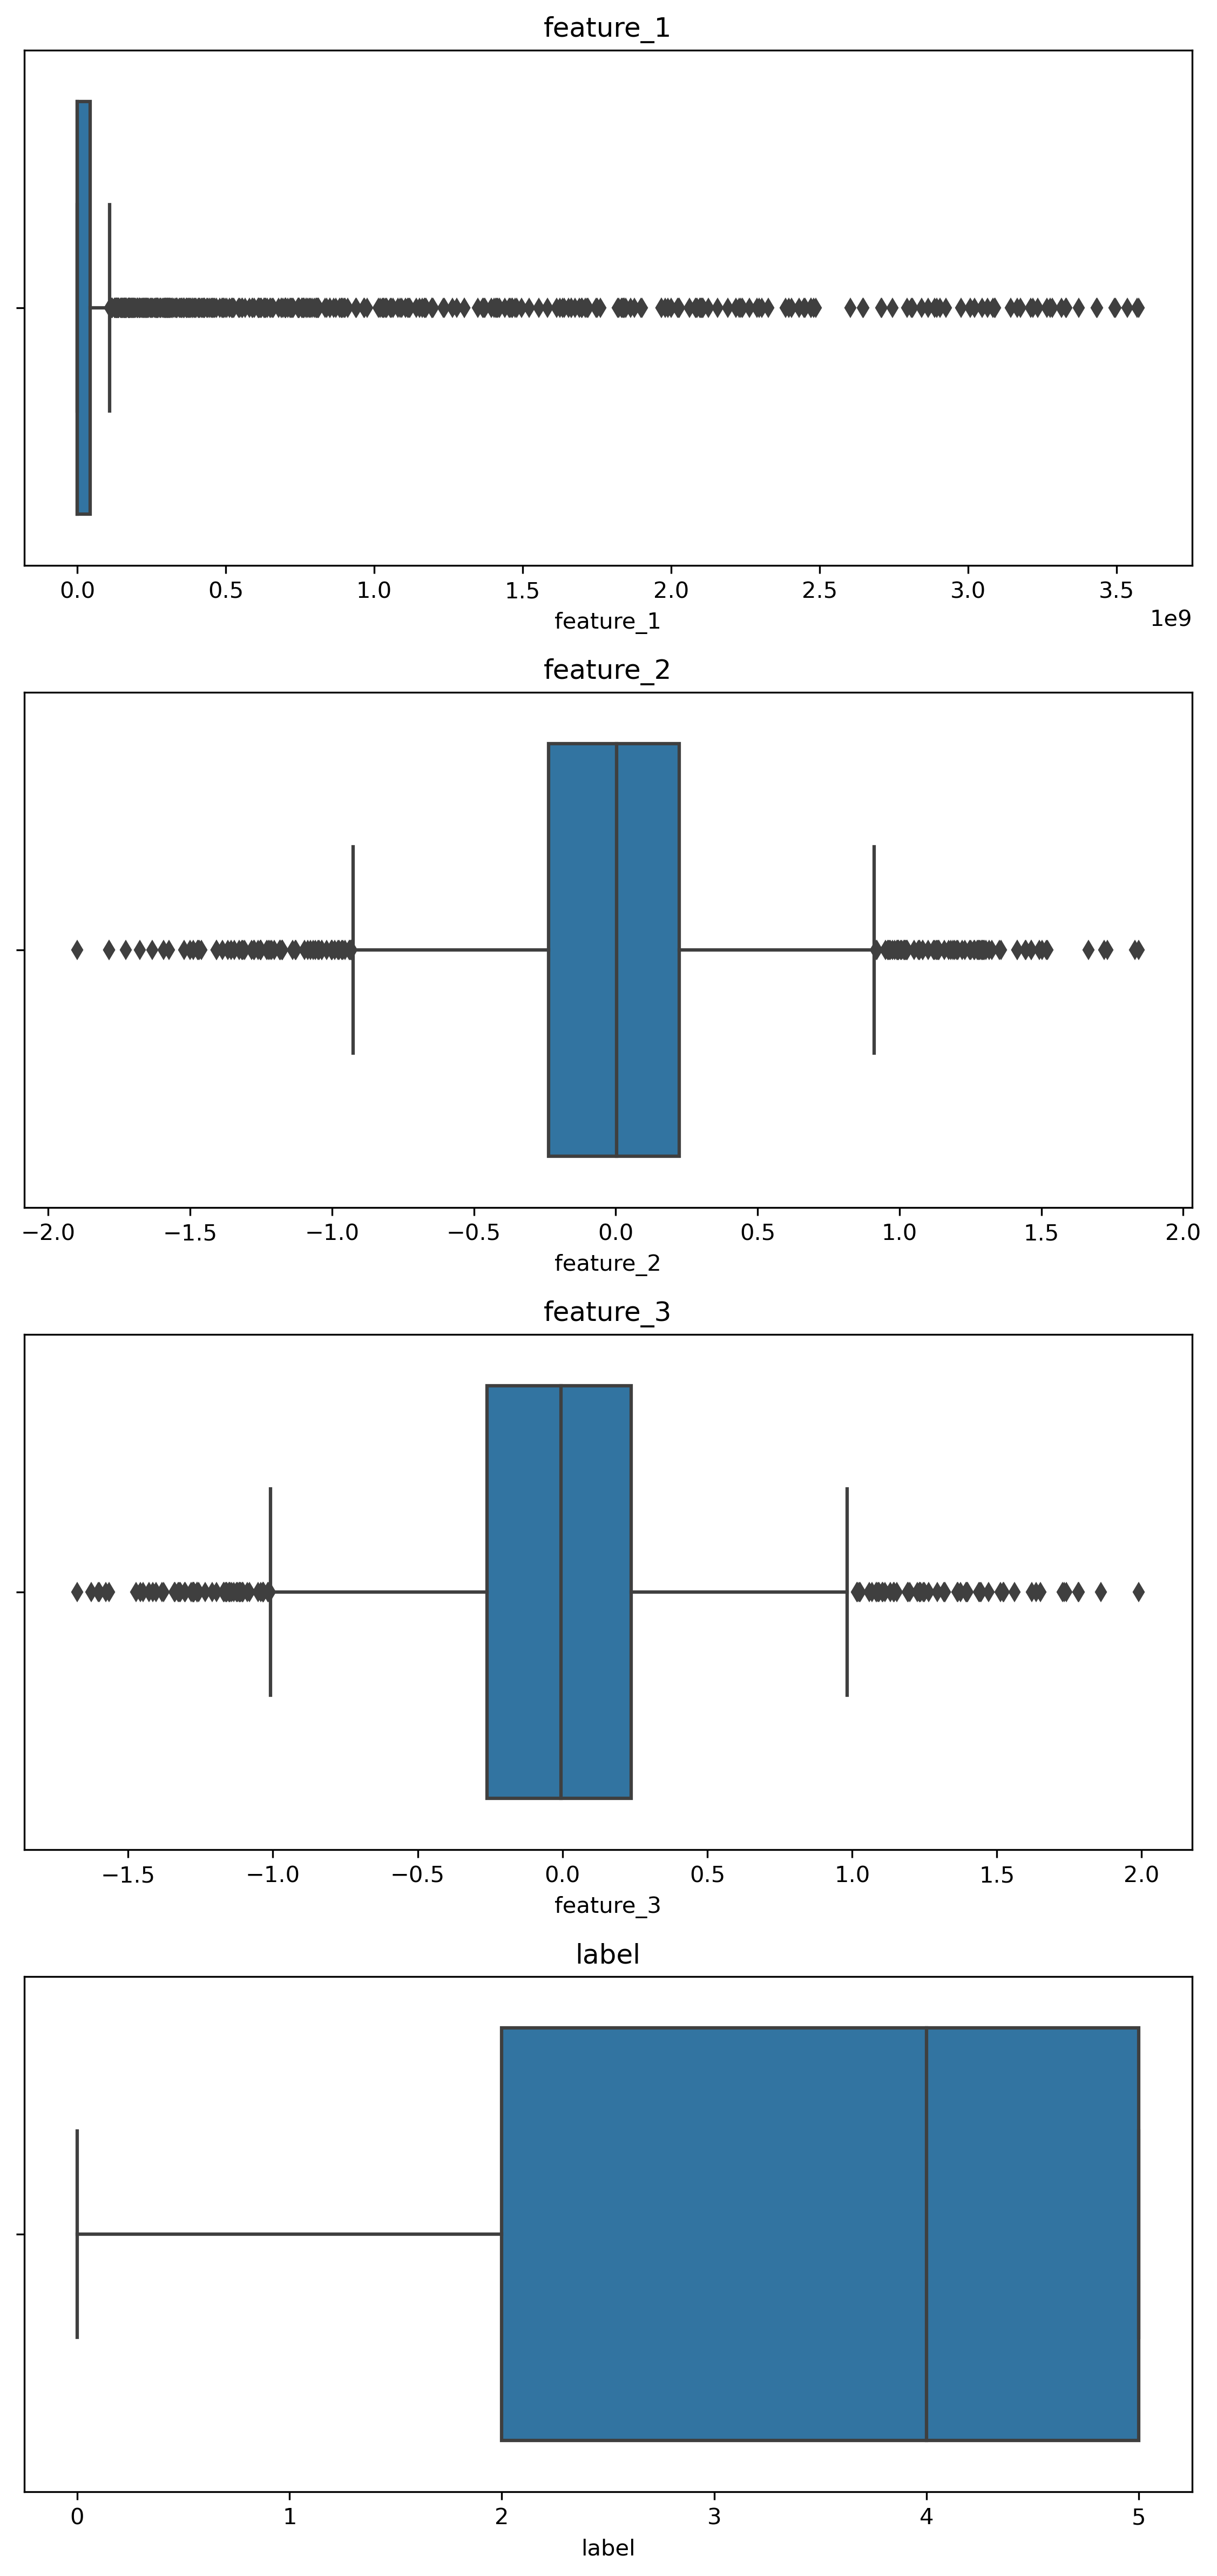

In [6]:
fig,axes = plt.subplots(1,1,figsize=(15,4 * 4),dpi=300)

for ind,col in enumerate(df1tr):
    plt.subplot(4,2,2*ind+1)
    sns.boxplot(data=df1tr,x=col);
    plt.gca().set_title(col)

    
fig.tight_layout()
plt.show()

Большое количество выбросов

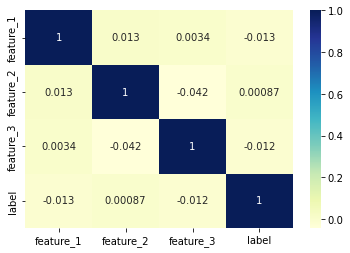

In [7]:
dataplot = sns.heatmap(df1tr.corr(), cmap="YlGnBu", annot=True)

    С корреляцией признаков проблем не возникло

Ищем выбросы через межквартиольный размах IQR за столбец  

In [8]:
Q1 = df1tr.quantile(0.25)
Q3 = df1tr.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
 
mask_out = ((df1tr < lower) | (df1tr > upper)).any(axis = 1)
df1tr[mask_out].shape

(717, 4)

In [9]:
mask_no_out = ((df1tr >= lower) & (df1tr <= upper)).all(axis = 1)

In [10]:
df1tr=df1tr[mask_no_out]

<AxesSubplot:>

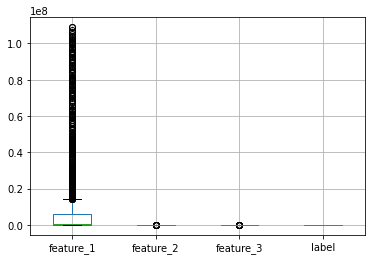

In [11]:
df1tr.boxplot()

Сильно не помогло, поэтому воспользуемся модифицированной z oценкой, опять же столбец label не будет затронут

In [12]:
median = df1tr.median()
dev_median = df1tr - (df1tr.median())
abs_dev_median = np.abs(dev_median)
MAD = abs_dev_median.median()
 
zmod = (0.6745 * (df1tr - df1tr.median())) / (MAD + 1e-5)
 
# создадим фильтр
zmod_mask = (np.abs(zmod) < 3.5).all(axis = 1)
 
df1tr = df1tr[zmod_mask]
df1tr.shape

(1097, 4)

<AxesSubplot:>

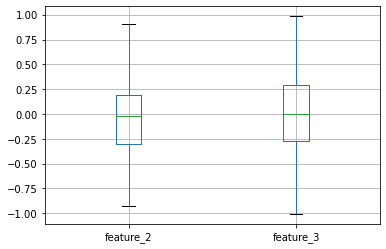

In [13]:
df1tr.iloc[:,1:3].boxplot()

Чтож, мы попытались 2.1

In [14]:
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
df1tr=pd.read_csv('./training_datasets/train_data.csv')
#без предобработки точность выше))
y = df1tr.label
df1tr.drop(['label'], axis=1, inplace=True)
X = df1tr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


2.2 валидационная выборка x_test y_test

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
DT= DecisionTreeClassifier(random_state=123)
start_time = time.time()
DT.fit(X_train,y_train)
pred=DT.predict(X_test)

print("acc:",accuracy_score(y_test,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("R2",r2_score(y_test,pred))
print("--- %s seconds ---" % (time.time() - start_time))

acc: 0.74375
MAE: 0.25833333333333336
R2 0.9131628369103889
--- 0.007978677749633789 seconds ---


In [16]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(random_state=123)
start_time = time.time()
RF.fit(X_train,y_train)
pred=RF.predict(X_test)

print("acc:",accuracy_score(y_test,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("R2",r2_score(y_test,pred))
print("--- %s seconds ---" % (time.time() - start_time))

acc: 0.78125
MAE: 0.22083333333333333
R2 0.9255681459231905
--- 0.21803021430969238 seconds ---


In [17]:
from xgboost.sklearn import XGBClassifier
XG= XGBClassifier(random_state=123)
start_time = time.time()
XG.fit(X_train,y_train)
pred=XG.predict(X_test)

print("acc:",accuracy_score(y_test,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("R2",r2_score(y_test,pred))
print("--- %s seconds ---" % (time.time() - start_time))

acc: 0.8354166666666667
MAE: 0.17083333333333334
R2 0.9393518226040811
--- 0.43530917167663574 seconds ---


In [18]:
from lightgbm import LGBMClassifier
LG= LGBMClassifier(random_state=123)
start_time = time.time()
LG.fit(X_train,y_train)
pred=LG.predict(X_test)

print("acc:",accuracy_score(y_test,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("R2",r2_score(y_test,pred))
print("--- %s seconds ---" % (time.time() - start_time))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 3
[LightGBM] [Info] Start training from score -2.130735
[LightGBM] [Info] Start training from score -2.157403
[LightGBM] [Info] Start training from score -1.946952
[LightGBM] [Info] Start training from score -2.189442
[LightGBM] [Info] Start training from score -1.345472
[LightGBM] [Info] Start training from score -1.384213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
acc: 0.84375
MAE: 0.1625
R2 0.9421085579402593
--- 0.2790799140930176 seconds ---


2.3 обучены дерево решений, Random Forest, XGBoost, LGBoost 2.3
Лучший результат по сововкупности метрик accuracy, MAE, R2 у LGBM Classifier, но по времени он самый долгий
2.4 точность и время измерялись во время обучения

In [142]:
from lightgbm import LGBMClassifier
LG= LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                    random_state=4342,
                  subsample_for_bin = 70000,)
start_time = time.time()
LG.fit(X_train,y_train)
pred=LG.predict(X_test)

print("acc:",accuracy_score(y_test,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test,pred))
print("R2",r2_score(y_test,pred))
print("--- %s seconds ---" % (time.time() - start_time))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 3
[LightGBM] [Info] Start training from score -2.130735
[LightGBM] [Info] Start training from score -2.157403
[LightGBM] [Info] Start training from score -1.946952
[LightGBM] [Info] Start training from score -2.189442
[LightGBM] [Info] Start training from score -1.345472
[LightGBM] [Info] Start training from score -1.384213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
acc: 0.84375
MAE: 0.1625
R2 0.9421085579402593
--- 0.2478470802307129 seconds ---


In [149]:
import joblib

joblib.dump(LG, "my_model.pkl") 

['my_model.pkl']

Подбором оптимальных гиперпараметров точность увеличить не удалось, но удалось снизить время 2.5

In [20]:
test1=pd.read_csv('./training_datasets/test_data.csv')
np.savetxt("sample_submission.csv", LG.predict(test1), delimiter=",",fmt='%s')

2.6

## Часть 2

In [110]:
df2=pd.read_csv('./training_datasets/train_shapes.csv')
df2.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,5/31/2005 01:20,doncaster (south yorkshire) (uk/england),NaN,gb,unknown,600,10 minutes,Bright red light hovering and taking off,6/20/2005,53.533333,-1.116667
1,11/10/2002 05:32,southfield,mi,us,other,5,5 secs? more or less,I HAVE NEVER HEARD A SOUND LIKE THIS COMING FR...,11/16/2002,42.473333,-83.221944
2,12/25/2009 00:30,seabrook,tx,us,unknown,5,5 seconds,A rather large yellow laser beam tracked from ...,2/14/2010,29.563889,-95.025278
3,12/16/1985 19:00,vallejo,ca,us,triangle,0,30,A shaped object with amber/organge lights&#44 ...,10/30/2006,38.104167,-122.255556
4,9/30/2005 18:28,coral springs,fl,us,disk,60.0,1 minute,SHIP BY THE SUN TOOK A PICTURE IN AMAZEMENT,10/11/2005,26.270833,-80.270833


In [78]:
df2.describe()

,latitude,longitude
count,62075.000000,62075.000000
mean,37.424185,-84.994598
std,11.621086,41.353517
min,-82.862752,-176.658056
25%,34.035000,-112.030972
50%,39.205833,-87.650000
75%,42.700556,-77.690822
max,71.387500,178.441900


In [111]:
df2.datetime=pd.to_datetime(df2.datetime, format='%m/%d/%Y %H:%M',errors='coerce')
df2["date posted"]=pd.to_datetime(df2["date posted"], format='%m/%d/%Y',errors='coerce')
df2.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,2005-05-31 01:20:00,doncaster (south yorkshire) (uk/england),NaN,gb,unknown,600,10 minutes,Bright red light hovering and taking off,2005-06-20,53.533333,-1.116667
1,2002-11-10 05:32:00,southfield,mi,us,other,5,5 secs? more or less,I HAVE NEVER HEARD A SOUND LIKE THIS COMING FR...,2002-11-16,42.473333,-83.221944
2,2009-12-25 00:30:00,seabrook,tx,us,unknown,5,5 seconds,A rather large yellow laser beam tracked from ...,2010-02-14,29.563889,-95.025278
3,1985-12-16 19:00:00,vallejo,ca,us,triangle,0,30,A shaped object with amber/organge lights&#44 ...,2006-10-30,38.104167,-122.255556
4,2005-09-30 18:28:00,coral springs,fl,us,disk,60.0,1 minute,SHIP BY THE SUN TOOK A PICTURE IN AMAZEMENT,2005-10-11,26.270833,-80.270833


In [112]:
import datetime
df2['days_between'] = (df2['date posted']-df2['datetime']).dt.days
df2.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,days_between
0,2005-05-31 01:20:00,doncaster (south yorkshire) (uk/england),NaN,gb,unknown,600,10 minutes,Bright red light hovering and taking off,2005-06-20,53.533333,-1.116667,19.0
1,2002-11-10 05:32:00,southfield,mi,us,other,5,5 secs? more or less,I HAVE NEVER HEARD A SOUND LIKE THIS COMING FR...,2002-11-16,42.473333,-83.221944,5.0
2,2009-12-25 00:30:00,seabrook,tx,us,unknown,5,5 seconds,A rather large yellow laser beam tracked from ...,2010-02-14,29.563889,-95.025278,50.0
3,1985-12-16 19:00:00,vallejo,ca,us,triangle,0,30,A shaped object with amber/organge lights&#44 ...,2006-10-30,38.104167,-122.255556,7622.0
4,2005-09-30 18:28:00,coral springs,fl,us,disk,60.0,1 minute,SHIP BY THE SUN TOOK A PICTURE IN AMAZEMENT,2005-10-11,26.270833,-80.270833,10.0


In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62075 entries, 0 to 62074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              61190 non-null  datetime64[ns]
 1   city                  62075 non-null  object        
 2   state                 56871 non-null  object        
 3   country               53439 non-null  object        
 4   shape                 60041 non-null  object        
 5   duration (seconds)    62074 non-null  object        
 6   duration (hours/min)  60022 non-null  object        
 7   comments              62048 non-null  object        
 8   date posted           62075 non-null  datetime64[ns]
 9   latitude              62075 non-null  float64       
 10  longitude             62075 non-null  float64       
 11  days_between          61190 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 5.7+ MB


In [114]:
df2=df2.dropna()

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48321 entries, 1 to 62074
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              48321 non-null  datetime64[ns]
 1   city                  48321 non-null  object        
 2   state                 48321 non-null  object        
 3   country               48321 non-null  object        
 4   shape                 48321 non-null  object        
 5   duration (seconds)    48321 non-null  object        
 6   duration (hours/min)  48321 non-null  object        
 7   comments              48321 non-null  object        
 8   date posted           48321 non-null  datetime64[ns]
 9   latitude              48321 non-null  float64       
 10  longitude             48321 non-null  float64       
 11  days_between          48321 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 4.8+ MB


In [116]:
df2=df2.drop(columns=['datetime','date posted'])

In [117]:
print('unique cities',df2.city.unique().shape)
print('unique states',df2.state.unique().shape)

unique cities (10137,)
unique states (66,)


In [118]:
df2=df2.drop('city', axis=1)

In [119]:
print('unique countryies',df2.country.unique().shape)

unique countryies (4,)


In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48321 entries, 1 to 62074
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 48321 non-null  object 
 1   country               48321 non-null  object 
 2   shape                 48321 non-null  object 
 3   duration (seconds)    48321 non-null  object 
 4   duration (hours/min)  48321 non-null  object 
 5   comments              48321 non-null  object 
 6   latitude              48321 non-null  float64
 7   longitude             48321 non-null  float64
 8   days_between          48321 non-null  float64
dtypes: float64(3), object(6)
memory usage: 3.7+ MB


In [121]:
df2=df2.drop(columns=['duration (seconds)','duration (hours/min)','comments'])

In [54]:
#df2.comments=len(df2.comments)

In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48321 entries, 1 to 62074
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         48321 non-null  object 
 1   country       48321 non-null  object 
 2   shape         48321 non-null  object 
 3   latitude      48321 non-null  float64
 4   longitude     48321 non-null  float64
 5   days_between  48321 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.6+ MB


In [123]:
pd.get_dummies(df2)
yyy=df2["shape"]
df2=df2.drop(columns=['shape'])

In [124]:
df2.head()

,state,country,latitude,longitude,days_between
1,mi,us,42.473333,-83.221944,5.0
2,tx,us,29.563889,-95.025278,50.0
3,ca,us,38.104167,-122.255556,7622.0
4,fl,us,26.270833,-80.270833,10.0
5,ma,us,42.065278,-71.248333,43.0


In [125]:
xxx=pd.get_dummies(df2)

In [131]:
print(yyy.unique())
print(yyy.head(5))

['other' 'unknown' 'triangle' 'disk' 'flash' 'oval' 'light' 'sphere'
 'circle' 'cylinder' 'cigar' 'fireball' 'cone' 'teardrop' 'chevron'
 'formation' 'diamond' 'changing' 'rectangle' 'egg' 'cross' 'changed'
 'flare' 'delta' 'crescent' 'round' 'pyramid']
1       other
2     unknown
3    triangle
4        disk
5       flash
Name: shape, dtype: object


In [136]:
from sklearn import preprocessing
yyy=pd.DataFrame(yyy)
le = preprocessing.LabelEncoder()
le.fit(yyy['shape'])
yyy['shape']=le.transform(yyy['shape'])
le.fit(yyy['shape'])
yyy['shape']=le.transform(yyy['shape'])
print(yyy)

       shape
1         18
2         26
3         25
4         11
5         15
...      ...
62070     16
62071      4
62072      1
62073     17
62074     17

[48321 rows x 1 columns]


In [137]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(xxx, yyy, test_size=0.2, random_state=2)

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
DT2= DecisionTreeClassifier(random_state=123)
start_time = time.time()
DT2.fit(X_train2,y_train2)
pred=DT2.predict(X_test2)

print("acc:",accuracy_score(y_test2,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test2,pred))
print("R2",r2_score(y_test2,pred))
print("--- %s seconds ---" % (time.time() - start_time))

acc: 0.1182617692705639
MAE: 7.992343507501293
R2 -0.9865367766857727
--- 0.3291492462158203 seconds ---


In [139]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(random_state=123)
start_time = time.time()
RF.fit(X_train2,y_train2)
pred=RF.predict(X_test2)

print("acc:",accuracy_score(y_test2,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test2,pred))
print("R2",r2_score(y_test2,pred))
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\Admin\AppData\Local\Temp\ipykernel_12616\620718562.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train2,y_train2)


acc: 0.14009311950336265
MAE: 7.62493533367822
R2 -0.8594248643053737
--- 7.958386182785034 seconds ---


In [141]:
from lightgbm import LGBMClassifier
LG= LGBMClassifier(random_state=123)
start_time = time.time()
LG.fit(X_train2,y_train2)
pred=LG.predict(X_test2)

print("acc:",accuracy_score(y_test2,pred))
#print("f1",f1_score(y_test,pred))
print("MAE:",mean_absolute_error(y_test2,pred))
print("R2",r2_score(y_test2,pred))
print("--- %s seconds ---" % (time.time() - start_time))

C:\Program Files\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 889
[LightGBM] [Info] Number of data points in the train set: 38656, number of used features: 65
[LightGBM] [Info] Start training from score -10.562457
[LightGBM] [Info] Start training from score -3.669816
[LightGBM] [Info] Start training from score -4.339881
[LightGBM] [Info] Start training from score -3.646734
[LightGBM] [Info] Start training from score -2.338294
[LightGBM] [Info] Start training from score -5.687260
[LightGBM] [Info] Start training from score -10.562457
[LightGBM] [Info] Start training from score -5.774966
[LightGBM] [Info] Start training from score -4.153928
[LightGBM] [Info] Start training from score -9.869310
[LightGBM] [Info] Start training from score -4.222098
[LightGBM] [Info] Start training from score -2.74001

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
test1=pd.read_csv('./training_datasets/test_shapes.csv')
np.savetxt("sample_submission_shapes.csv", LG.predict(test1), delimiter=",",fmt='%s')